# Multiclass classification
---------------------------------

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset).
 This is a small and easy to train dataset which goal is to classify wines
 into three groups (which cultivator it's from) using features based on the results
 of chemical analysis.

### Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from atom import ATOMClassifier

# Load the dataset's features and targets
dataset = load_wine()

# Convert to pd.DataFrame to get the names of the features
data = np.c_[dataset.data, dataset.target]
columns = np.append(dataset.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
y = data['target']

In [2]:
# Let's have a look at the dataset
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Run the pipeline

In [3]:
# Call ATOMclass for ML task exploration
atom = ATOMClassifier(X, y, n_jobs=-1, verbose=3)

# Fit the pipeline with the selected models
atom.pipeline(models=['LDA','RF', 'lSVM'],
              metric='f1_macro',
              max_iter=4,
              init_points=3,
              cv=3,
              bagging=10)

<<=============== ATOM ===============>>
Parallel processing with 4 cores.
Initial data cleaning...
Algorithm task: multiclass classification. Number of classes: 3.

Dataset stats ===================>
Shape: (178, 14)
Scaled: False
----------------------------------
Size of training set: 124
Size of test set: 54
----------------------------------
Class balance: 0:1:2 <==> 1.2:1.5:1.0
Instances in target per class:
|    |    total |    train_set |    test_set |
|---:|---------:|-------------:|------------:|
|  0 |       59 |           40 |          19 |
|  1 |       71 |           53 |          18 |
|  2 |       48 |           31 |          17 |


Running pipeline =================>
Models in pipeline: LDA, RF, lSVM
Metric: f1_macro


Running BO for Linear Discriminant Analysis...
Initial point: 1 --------------------------------
Parameters --> {'solver': 'svd'}
Evaluation --> f1_macro: 0.9754
Time elapsed: 0.774s   Total time: 0.774s
Initial point: 2 --------------------------------
Pa

### Analyze the results

In [4]:
atom.scores

,model,total_time,score_train,score_test,fit_time,bagging_mean,bagging_std,bagging_time
0,LDA,2.324s,1.000000,1.0,0.043s,1.000000,0.000000,0.039s
1,RF,11.797s,0.975759,1.0,1.150s,0.981706,0.018371,6.119s
2,lSVM,1.309s,0.984184,1.0,0.032s,1.000000,0.000000,0.030s


In [5]:
# Show the results for a different metric
atom.results('precision_macro')


Final results ================>>
Metric: precision_macro
--------------------------------
Linear Discriminant Analysis --> 1.000 !!
Random Forest                --> 1.000 !!
Linear SVM                   --> 1.000 !!


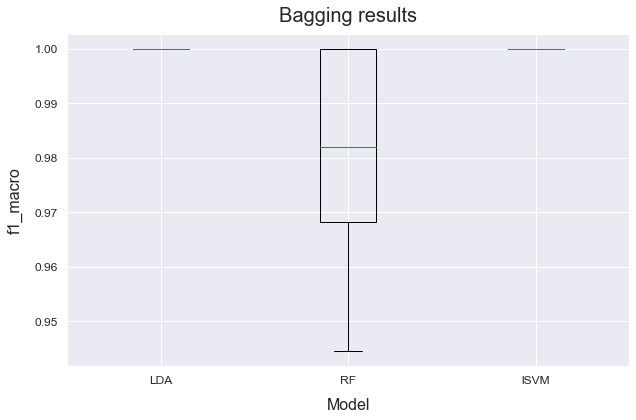

In [6]:
atom.plot_bagging()

### Let's have a closer look at the Random Forest

In [7]:
# Get the results on some other metrics
print('Jaccard score:', atom.rf.jaccard_weighted)
print('Recall score:', atom.rf.recall_macro)

Jaccard score: 1.0
Recall score: 1.0


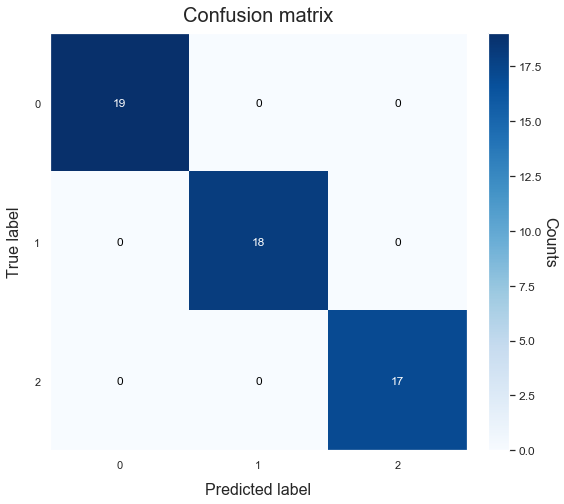

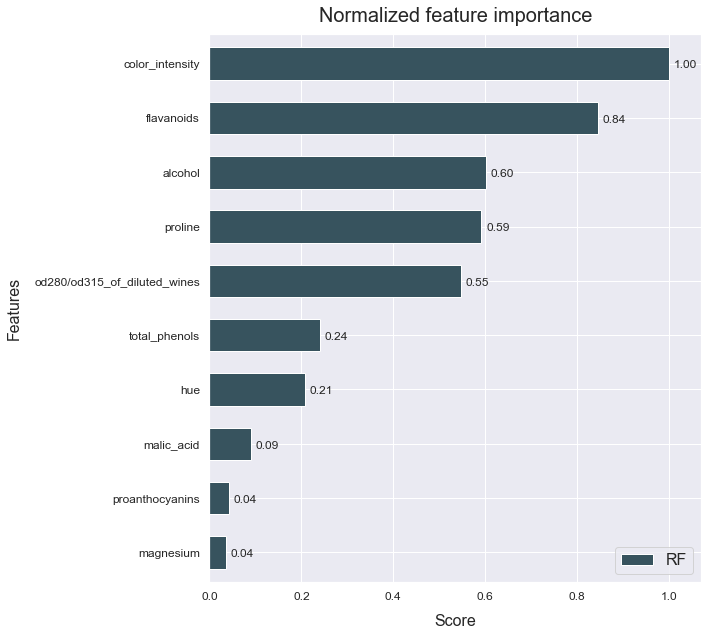

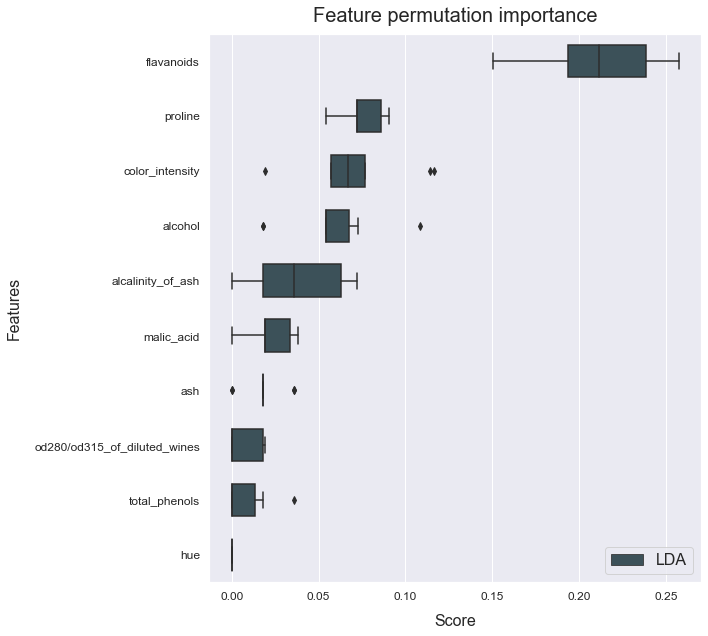

In [8]:
# Check the winner's confusion matrix
atom.RF.plot_confusion_matrix()

In [9]:
# Save the random forest class for production
atom.RF.save('Random_Forest_class')

Random Forest model subclass saved successfully!
